In [28]:
# Topic : Multiple Linear Regression and Residual Analysis
# Submitted by : Aadith Joseph Mathew
# Roll No: 23122101
# Date: 19th May 2024
# Submission : 20th May 2024

### Tools and Libraries:

* Pandas
* Matplotlib
* Seaborn
* Scikit-learn
* Numpy
* Scipy
* Statsmodel

### Sections:

* Importing Libraries
* Loading and Viewing the Dataset
* EDA
* Visualization
* Model Building
* Residual Analysis for Training Set
* Residual Analysis for Testing Set
* Residuals vs Features

--------------------------

### Importing Libraries

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import shapiro

#### Loading and Viewing the dataset

In [30]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [31]:
df.shape

(2938, 19)

In [32]:
df.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [33]:
df.tail()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
2933,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3
2937,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8,46.0


### EDA

In [34]:
df.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  2928 non-null   float64
 1   infant deaths                    2938 non-null   int64  
 2   Alcohol                          2744 non-null   float64
 3   percentage expenditure           2938 non-null   float64
 4   Hepatitis B                      2385 non-null   float64
 5   Measles                          2938 non-null   int64  
 6    BMI                             2904 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2919 non-null   float64
 9   Total expenditure                2712 non-null   float64
 10  Diphtheria                       2919 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

In [36]:
df.isnull().sum()

Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [37]:
df.dropna(inplace=True)
df

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [38]:
df.isnull().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [39]:
df.describe(include='all')

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,69.302304
std,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,8.796834
min,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,44.000000
25%,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,64.400000
50%,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,71.700000
75%,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,75.000000
max,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,89.000000


### Visualization

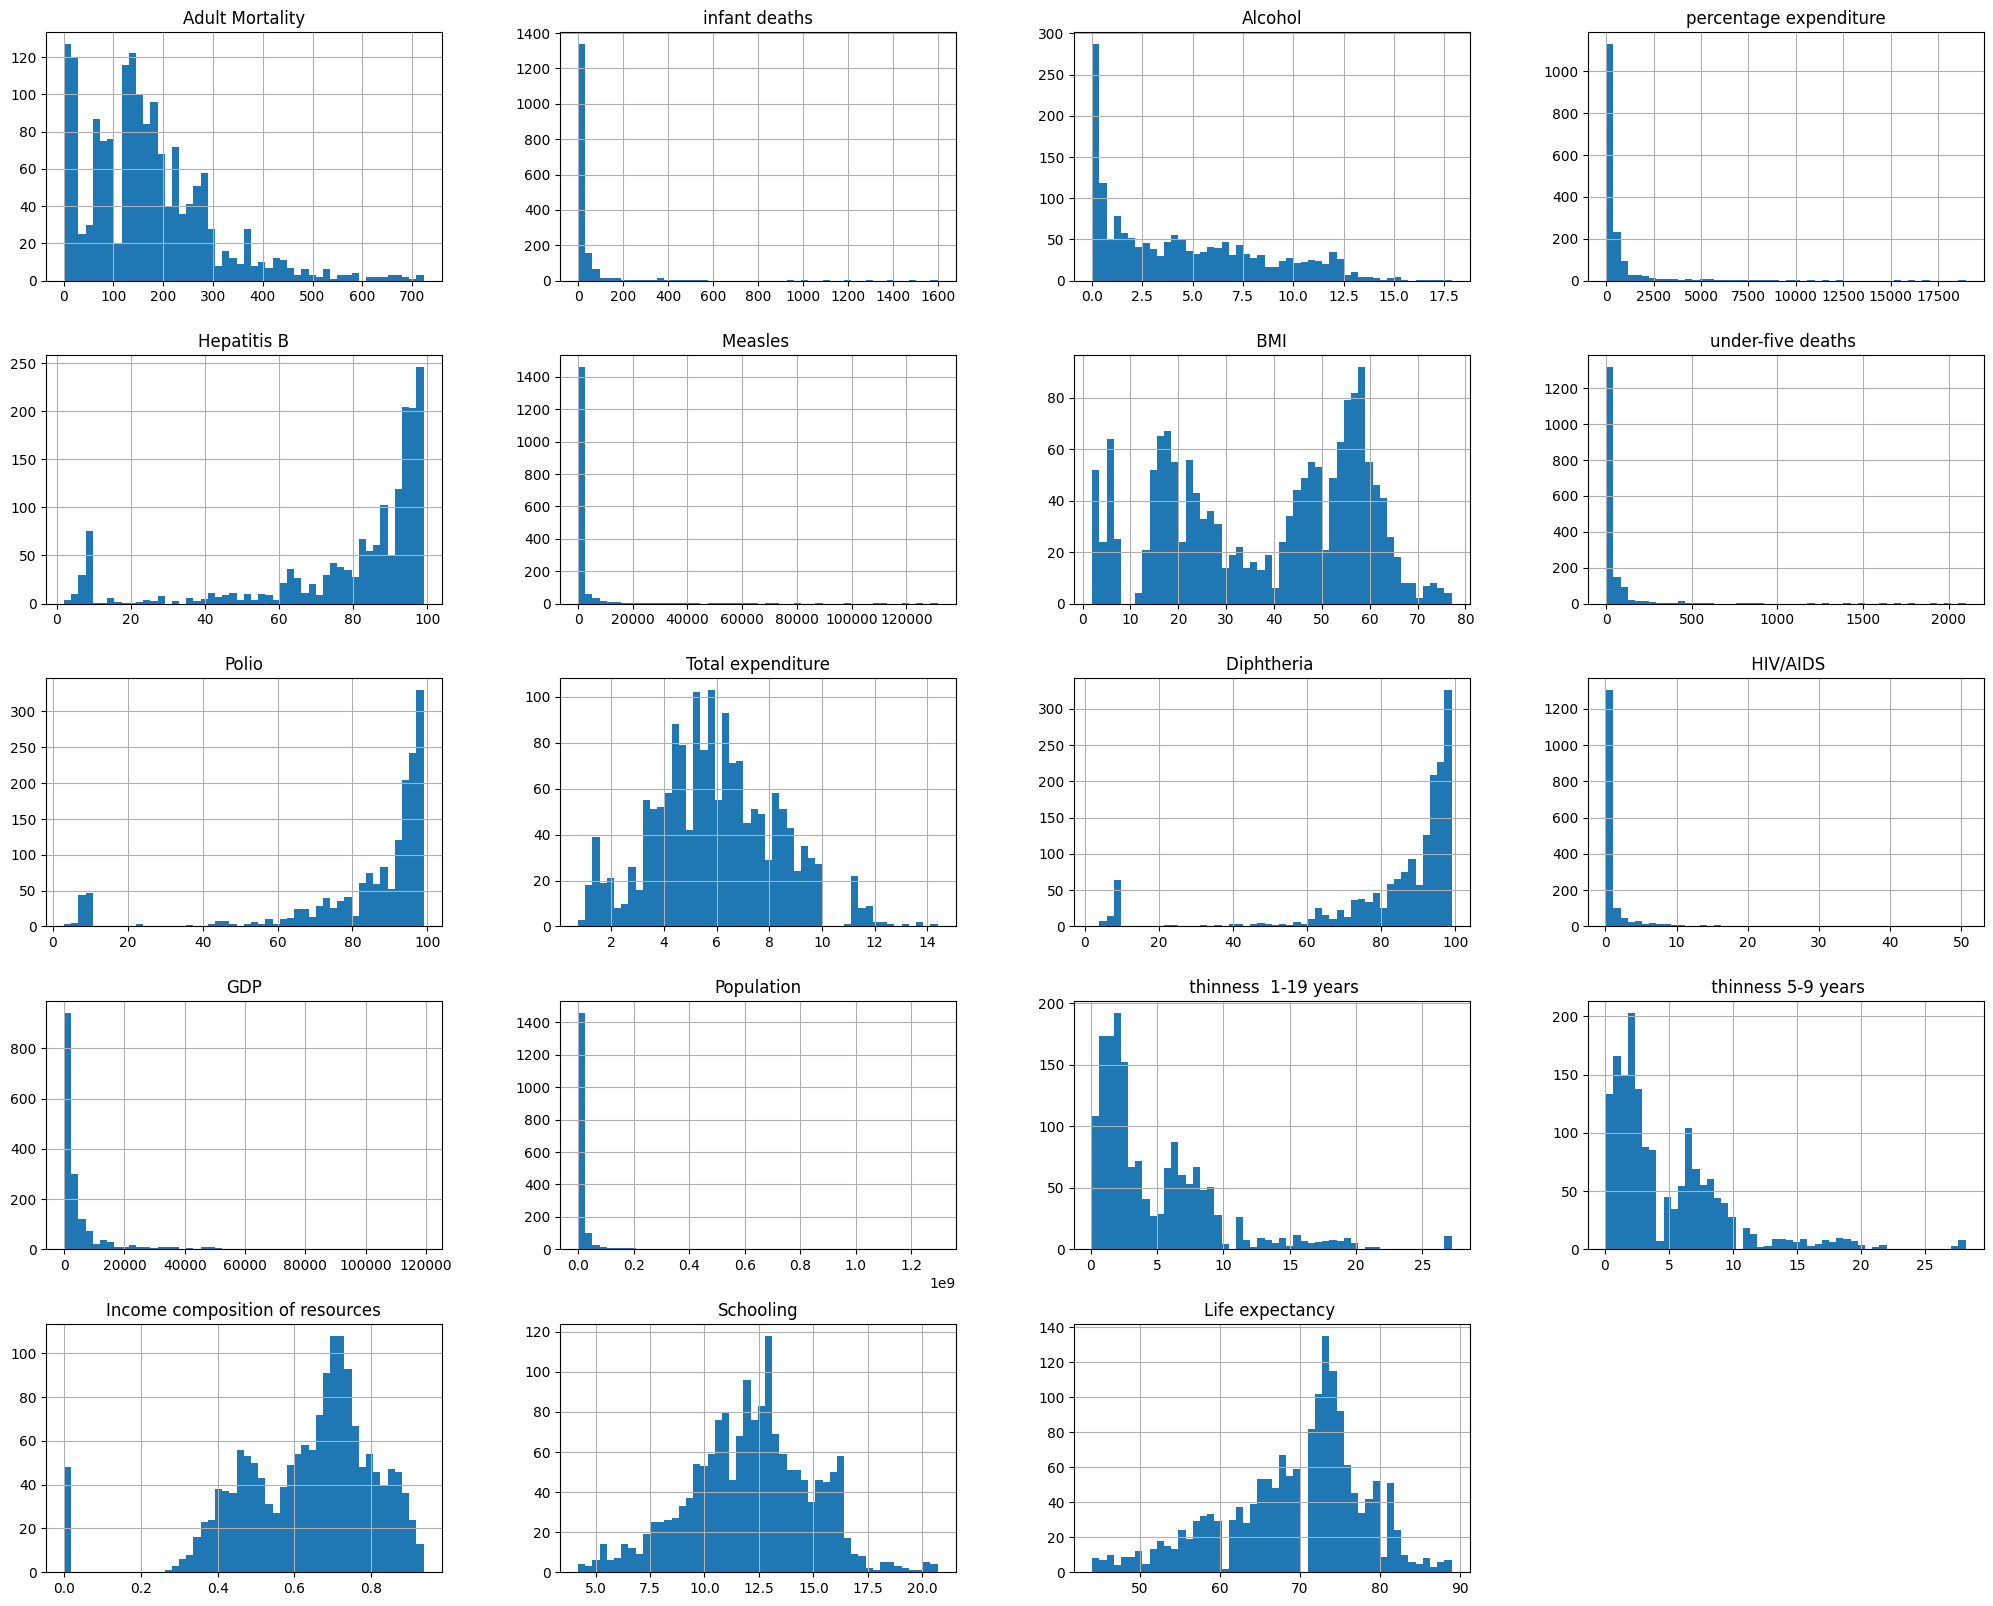

In [40]:
df.hist(bins=50, figsize=(25,20));

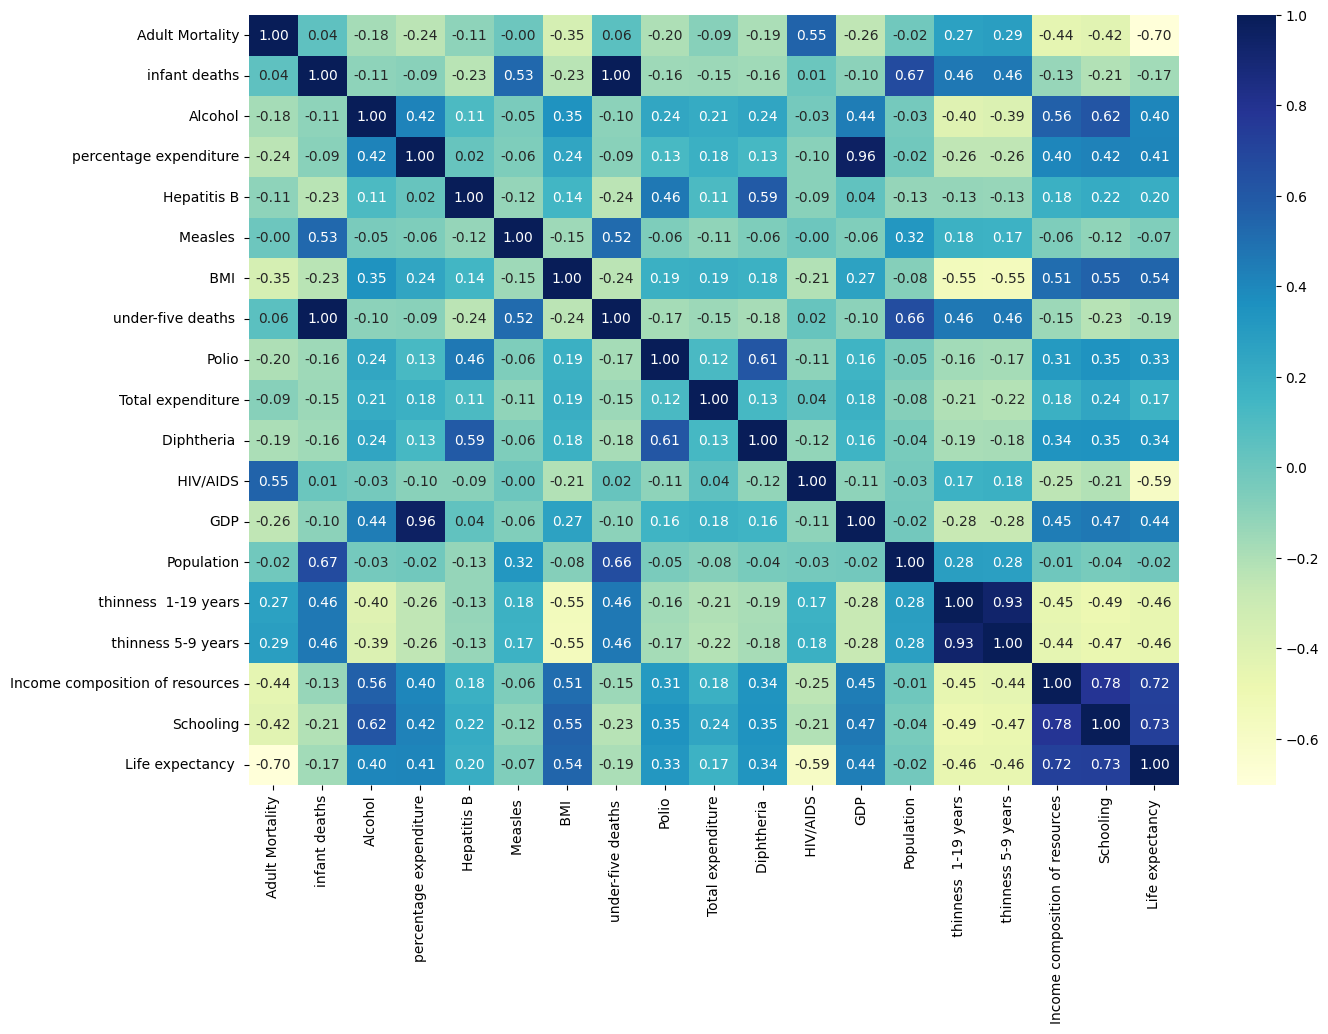

In [41]:
# Plotting heatmap for correlation
df_corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(df_corr, fmt = ".2f", annot = True, cmap = "YlGnBu")
plt.show()

### Model Building

In [42]:
X=np.array(df)
features=X[:,0:17]
target=X[:,-1]

In [43]:
# Splitting data for model building
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [44]:
# Fitting the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Predicting for training set
train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Calculate Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, train_pred)

# Calculate R-squared (R²)
r2_train = r2_score(y_train, train_pred)

# Calculate Adjusted R-squared
n = X_train.shape[0]  # number of observations
p = X_train.shape[1]  # number of predictors
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)

print(f'Mean Squared Error for training set: {mse_train}')
print(f'Root Mean Squared Error for training set: {rmse_train}')
print(f'Mean Absolute Error for training set: {mae_train}')
print(f'R-squared for training set: {r2_train}')
print(f'Adjusted R-squared for training set: {adjusted_r2_train}')

Mean Squared Error for training set: 15.018593819546656
Root Mean Squared Error for training set: 3.8753830545568855
Mean Absolute Error for training set: 2.976868402514919
R-squared for training set: 0.8022299630658867
Adjusted R-squared for training set: 0.7987674598445891


### Residual Analysis for Training Set

#### 1. Standardization

In [46]:
# Residual Analysis for training set
train_residuals = y_train - train_pred

# Standardize Residuals
residuals_mean = np.mean(train_residuals)
residuals_std = np.std(train_residuals)
train_standardized_residuals = (train_residuals - residuals_mean) / residuals_std

#### 2. Residual Plots

##### a. Predicted vs Actual Values

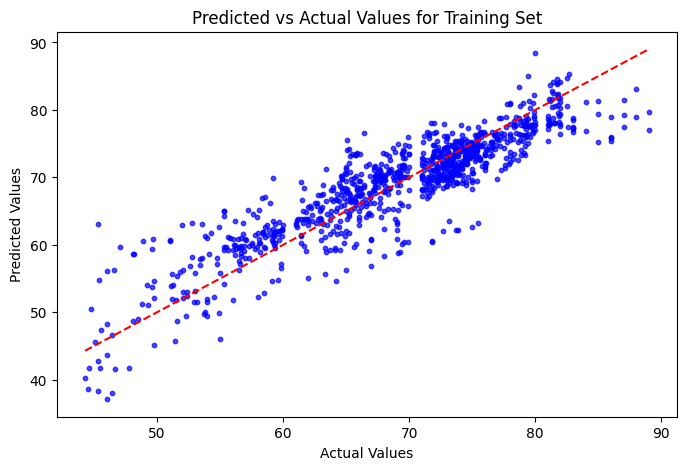

In [47]:
# Plotting Predicted vs Actual values for the training set
plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_pred, alpha=0.7, color='blue', s=10)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for Training Set')
plt.show()

##### b. Density Plot

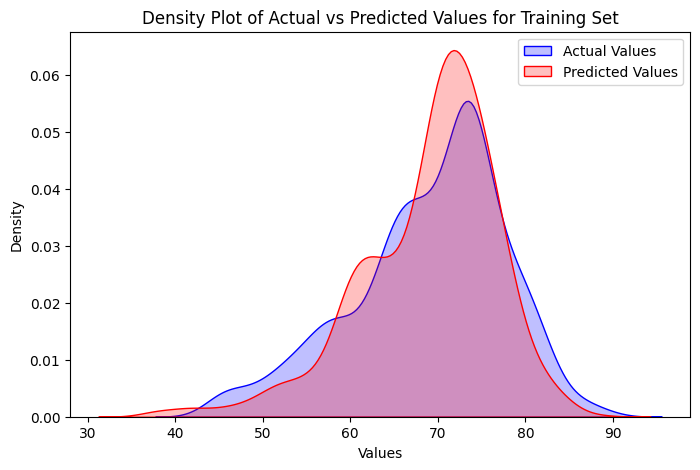

In [48]:
# Adding a density plot for better visualization
plt.figure(figsize=(8, 5))
sns.kdeplot(y_train, label='Actual Values', color='blue', fill=True)
sns.kdeplot(train_pred, label='Predicted Values', color='red', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Values for Training Set')
plt.legend()
plt.show()

#### 3. Normality of Residuals

##### a. Q-Q Plot

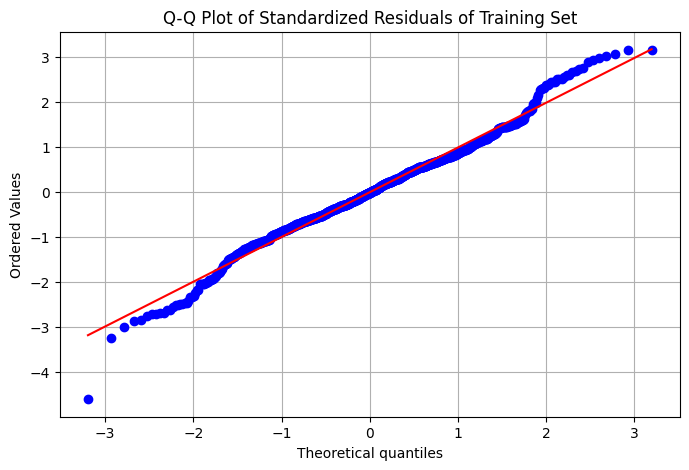

In [49]:
# Q-Q Plot of Standardized Residuals
plt.figure(figsize=(8, 5))
stats.probplot(train_standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals of Training Set')
plt.grid(True)
plt.show()

#### b. P-P Plot

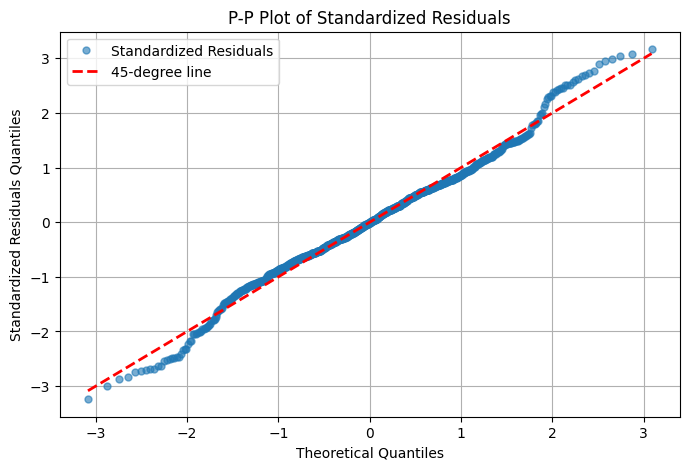

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming train_standardized_residuals are already defined

# P-P Plot of Standardized Residuals
probs = np.linspace(0, 1, len(train_standardized_residuals))
residuals_sorted = np.sort(train_standardized_residuals)
theoretical_quantiles = stats.norm.ppf(probs)

plt.figure(figsize=(8, 5))
plt.plot(theoretical_quantiles, residuals_sorted, 'o', markersize=5, alpha=0.6, label='Standardized Residuals')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='r', linestyle='--', linewidth=2, label='45-degree line')
plt.title('P-P Plot of Standardized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals Quantiles')
plt.legend()
plt.grid(True)
plt.show()

##### c. Histogram of Residuals

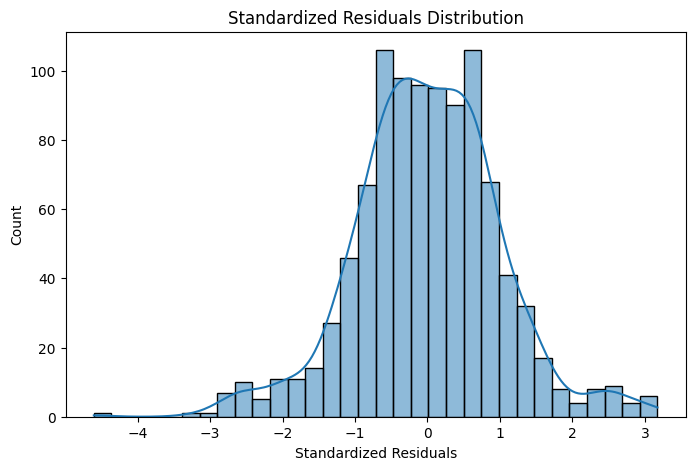

In [51]:
# Standardized Residuals Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(train_standardized_residuals, kde=True)
plt.xlabel('Standardized Residuals')
plt.title('Standardized Residuals Distribution')
plt.show()

##### d. Shapiro Test

In [52]:
# Perform Shapiro-Wilk test on the training set residuals
shapiro_test = shapiro(train_residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}')
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Fail to reject the null hypothesis: The residuals are normally distributed")
else:
    print("Reject the null hypothesis: The residuals are not normally distributed")

Shapiro-Wilk Test Statistic: 0.9869662023844683
Shapiro-Wilk Test p-value: 1.0540676043544388e-07
Reject the null hypothesis: The residuals are not normally distributed


#### 4. Independence of Residuals

##### Durbin Watson Test

In [53]:
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson test statistic for the residuals
dw_test = durbin_watson(train_residuals)
print(f'Durbin-Watson Test Statistic: {dw_test}')

# Interpretation
if dw_test < 1.5:
    interpretation = "There is evidence of positive autocorrelation."
elif 1.5 <= dw_test <= 2.5:
    interpretation = "There is no evidence of autocorrelation."
else:
    interpretation = "There is evidence of negative autocorrelation."

print(f'Interpretation: {interpretation}')

Durbin-Watson Test Statistic: 1.9739479358981786
Interpretation: There is no evidence of autocorrelation.


### Residual Analysis for Testing Set

In [54]:
# Predicting for testing set
test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for testing set
mse_test = mean_squared_error(y_test, test_pred)

# Calculate Root Mean Squared Error (RMSE) for testing set
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE) for testing set
mae_test = mean_absolute_error(y_test, test_pred)

# Calculate R-squared (R²) for testing set
r2_test = r2_score(y_test, test_pred)

# Calculate Adjusted R-squared for testing set
n_test = X_test.shape[0]  # number of observations
p_test = X_test.shape[1]  # number of predictors
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f'Mean Squared Error for testing set: {mse_test}')
print(f'Root Mean Squared Error for testing set: {rmse_test}')
print(f'Mean Absolute Error for testing set: {mae_test}')
print(f'R-squared for testing set: {r2_test}')
print(f'Adjusted R-squared for testing set: {adjusted_r2_test}')

Mean Squared Error for testing set: 14.043144886353868
Root Mean Squared Error for testing set: 3.7474184295797377
Mean Absolute Error for testing set: 2.790298449962226
R-squared for testing set: 0.8223453064409278
Adjusted R-squared for testing set: 0.8176410544307966


#### 1. Residual Plots

##### a. Standardising Residuals

In [55]:
# Residual Analysis
test_residuals = y_test - test_pred

# Standardize Residuals
residuals_mean = np.mean(test_residuals)
residuals_std = np.std(test_residuals)
test_standardized_residuals = (test_residuals - residuals_mean) / residuals_std

##### b. Predicted vs Actual Values

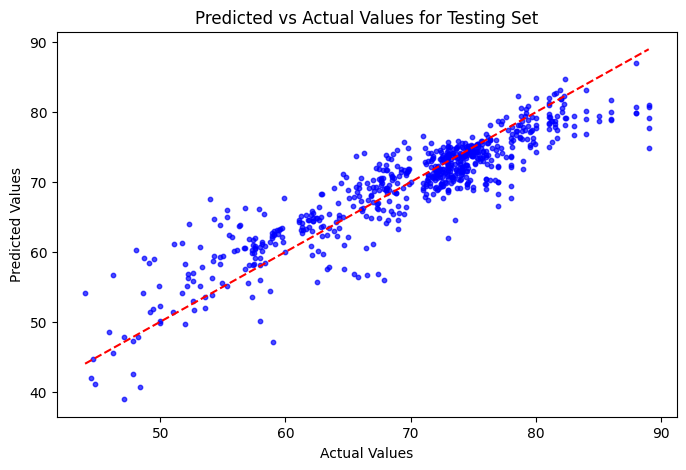

In [56]:
# Plotting Predicted vs Actual values for the training set
plt.figure(figsize=(8, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color='blue', s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for Testing Set')
plt.show()

##### c. Density Plot

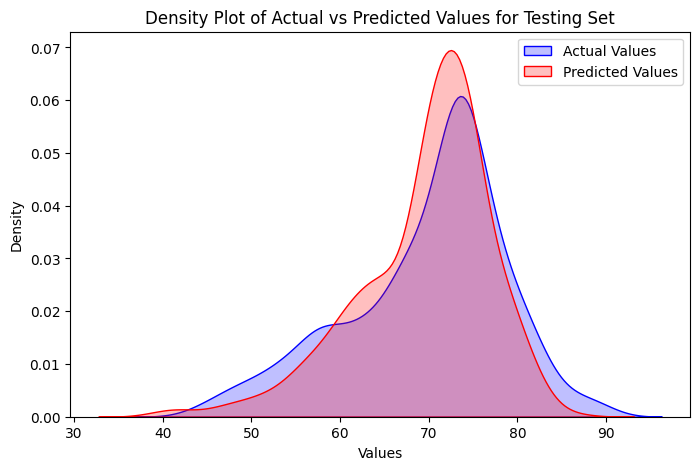

In [57]:
# Adding a density plot for better visualization
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual Values', color='blue', fill=True)
sns.kdeplot(test_pred, label='Predicted Values', color='red', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Values for Testing Set')
plt.legend()
plt.show()

#### 2. Normality of Residuals

##### a. Q-Q Plot

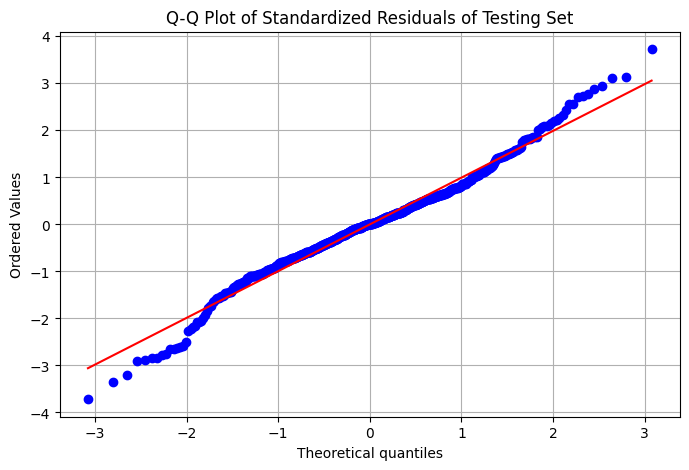

In [59]:
# Q-Q Plot of Standardized Residuals
plt.figure(figsize=(8, 5))
stats.probplot(test_standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals of Testing Set')
plt.grid(True)
plt.show()

#### b. P-P Plot

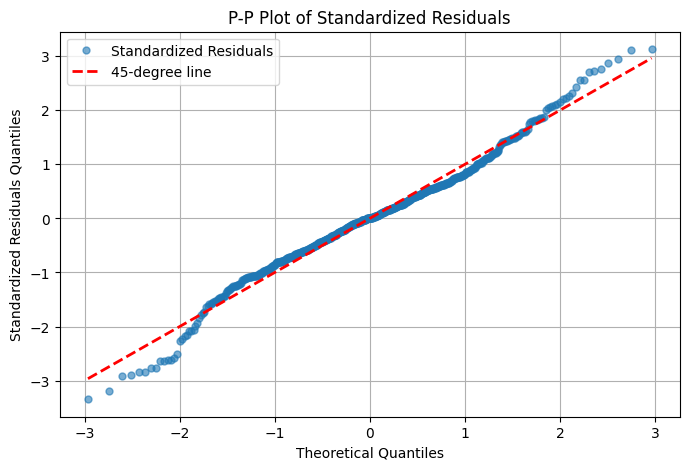

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming train_standardized_residuals are already defined

# P-P Plot of Standardized Residuals
probs = np.linspace(0, 1, len(test_standardized_residuals))
residuals_sorted = np.sort(test_standardized_residuals)
theoretical_quantiles = stats.norm.ppf(probs)

plt.figure(figsize=(8, 5))
plt.plot(theoretical_quantiles, residuals_sorted, 'o', markersize=5, alpha=0.6, label='Standardized Residuals')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='r', linestyle='--', linewidth=2, label='45-degree line')
plt.title('P-P Plot of Standardized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals Quantiles')
plt.legend()
plt.grid(True)
plt.show()

##### c. Histogram of Residuals

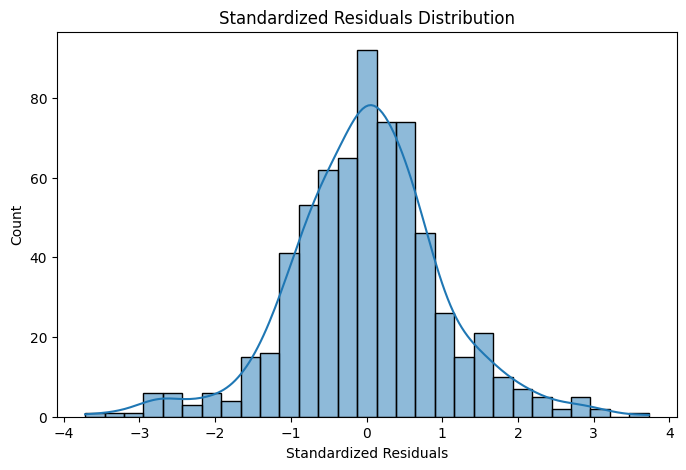

In [61]:
# Standardized Residuals Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(test_standardized_residuals, kde=True)
plt.xlabel('Standardized Residuals')
plt.title('Standardized Residuals Distribution')
plt.show()

##### d. Shapiro Test

In [62]:
# Perform Shapiro-Wilk test on the residuals
shapiro_test = shapiro(test_residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}')
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')

# Interpret the result
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Fail to reject the null hypothesis: The residuals are normally distributed")
else:
    print("Reject the null hypothesis: The residuals are not normally distributed")

Shapiro-Wilk Test Statistic: 0.9818764234884236
Shapiro-Wilk Test p-value: 2.7259116515369077e-07
Reject the null hypothesis: The residuals are not normally distributed


#### 3. Independence of Residuals

##### a. Durbin Watson Test

In [63]:
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson test statistic for the residuals
dw_test = durbin_watson(test_residuals)
print(f'Durbin-Watson Test Statistic: {dw_test}')

# Interpretation
if dw_test < 1.5:
    interpretation = "There is evidence of positive autocorrelation."
elif 1.5 <= dw_test <= 2.5:
    interpretation = "There is no evidence of autocorrelation."
else:
    interpretation = "There is evidence of negative autocorrelation."

print(f'Interpretation: {interpretation}')

Durbin-Watson Test Statistic: 2.1100510535084283
Interpretation: There is no evidence of autocorrelation.


#### 4. Leverage and Influence

##### a. Leverage vs Residuals

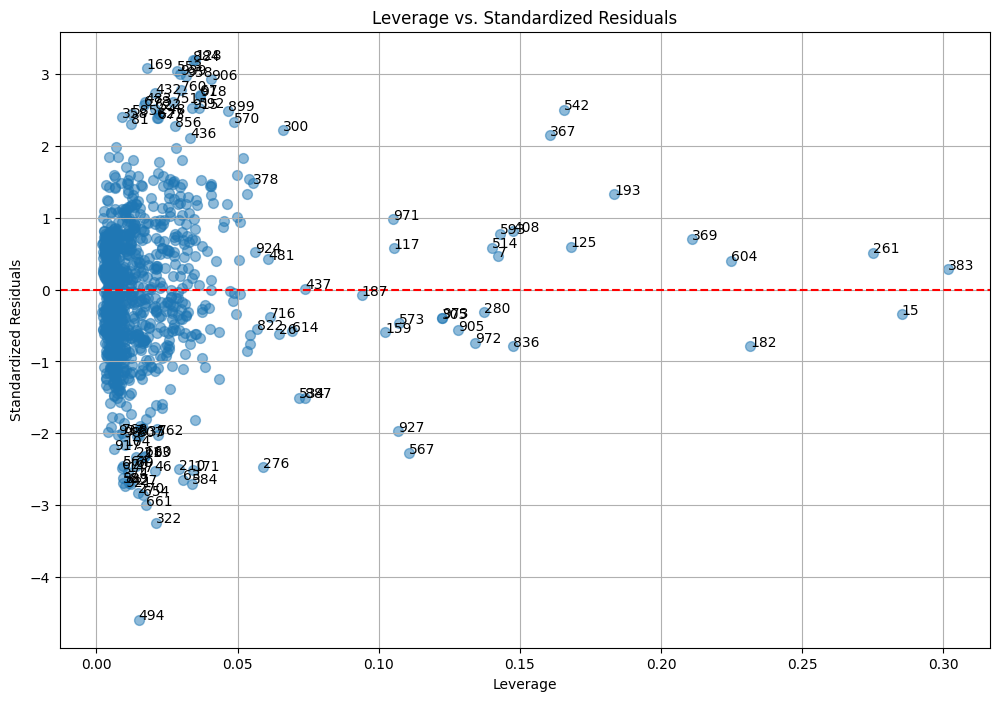

In [64]:
# Adding a constant to the features for statsmodels
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fitting the model with statsmodels for leverage and residuals plot
model_sm = sm.OLS(y_train, X_train_const).fit()

# Optional: Custom leverage vs. residuals plot with improved visibility
influence = model_sm.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

plt.figure(figsize=(12, 8))
plt.scatter(leverage, standardized_residuals, alpha=0.5, s=50)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage vs. Standardized Residuals')
plt.grid(True)

# Label points with high leverage or high residuals
threshold = 3 * np.mean(leverage)
for i in range(len(leverage)):
    if leverage[i] > threshold or np.abs(standardized_residuals[i]) > 2:
        plt.annotate(i, (leverage[i], standardized_residuals[i]))

plt.show()

##### b. Cook's Distance

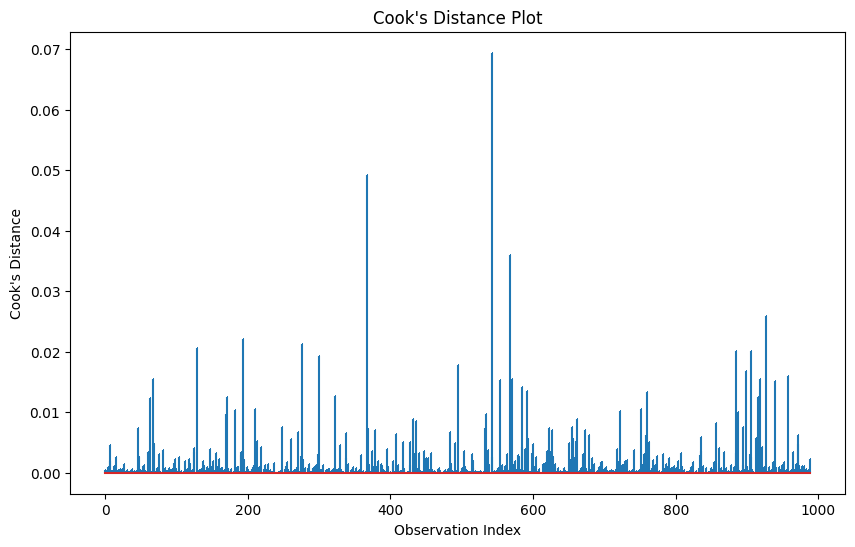

Influential points (Cook's Distance > 0.00): [  6  46  63  67  69 128 169 171 182 193 210 213 218 248 261 270 276 300
 322 329 337 367 369 378 408 418 427 432 436 483 490 494 533 534 542 553
 567 570 584 585 592 593 600 622 627 651 654 656 660 661 673 678 722 751
 759 760 762 836 856 861 884 887 895 899 906 912 915 918 921 927 939 958
 971 972]


In [65]:
influence = model_sm.get_influence()
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.show()

# Interpretation of Cook's Distance
influential_points = np.where(cooks_d > 4/len(X_train))[0]
if len(influential_points) > 0:
    print(f'Influential points (Cook\'s Distance > {4/len(X_train):.2f}): {influential_points}')
else:
    print('No influential points detected.')

#### 5. Autocorrelation

<Figure size 1000x600 with 0 Axes>

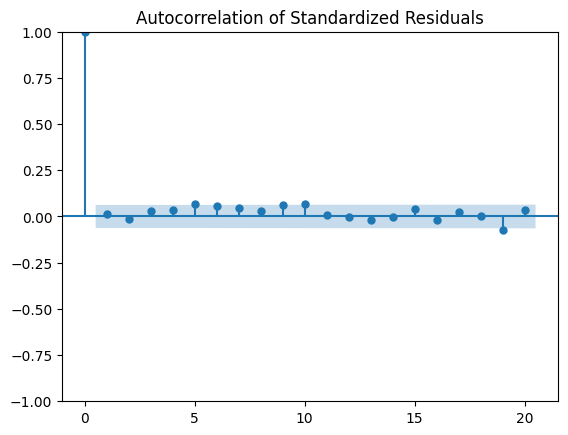

In [66]:
# Autocorrelation plot of standardized residuals
plt.figure(figsize=(10, 6))
plot_acf(standardized_residuals, lags=20)
plt.title('Autocorrelation of Standardized Residuals')
plt.show()

#### Residual Plot for Adult Mortality column

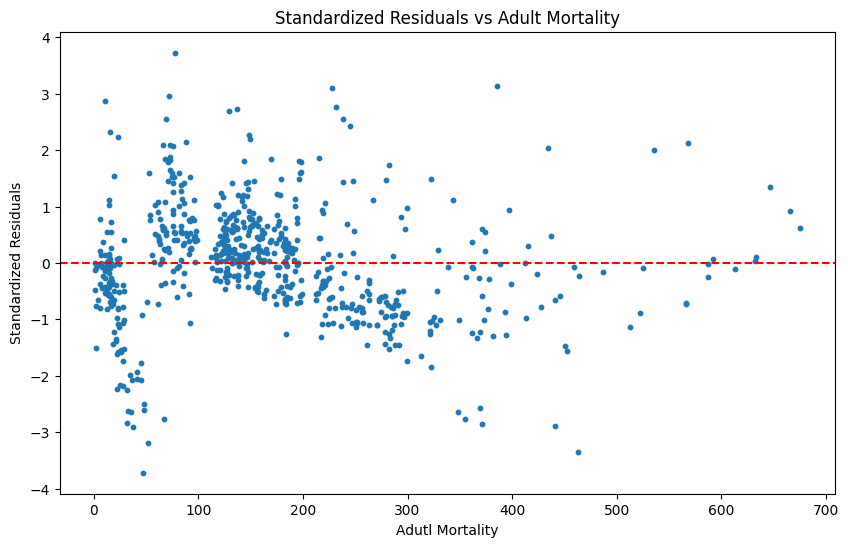

In [69]:
# Standardized Residuals vs Feature1
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,0], test_standardized_residuals, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Adutl Mortality')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Adult Mortality')
plt.show()

#### Residual Plot for Infants Deaths column

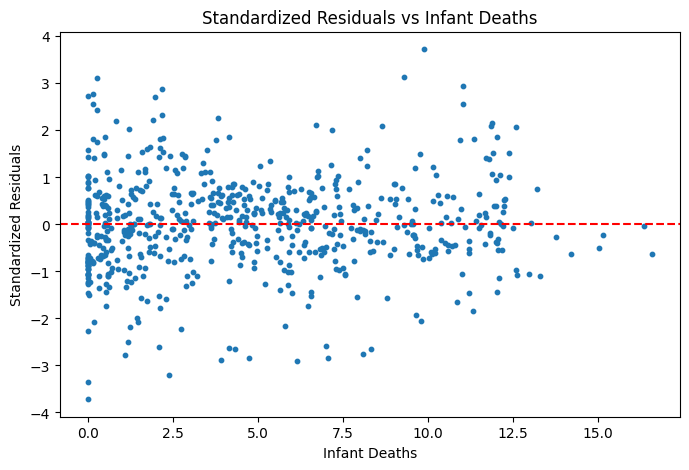

In [70]:
# Standardized Residuals vs Feature2
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:,2], test_standardized_residuals, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Infant Deaths')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Infant Deaths')
plt.show()